# Flight Price Prediction

Problem Statement:
    
    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Imprting the dataset

In [187]:
import pandas as pd
df=pd.read_csv('Flight Price Prediction.csv',parse_dates=['Date_of_Journey'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Importing the required libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [6]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# Getting a basic outlook over the project

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 542.6+ KB


Observations:
    
    1.Except response variable every other variables are of object types.

In [10]:
df.shape

(10683, 11)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# EDA

# Univariate Analysis

 **Column 1: Airline**

In [14]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

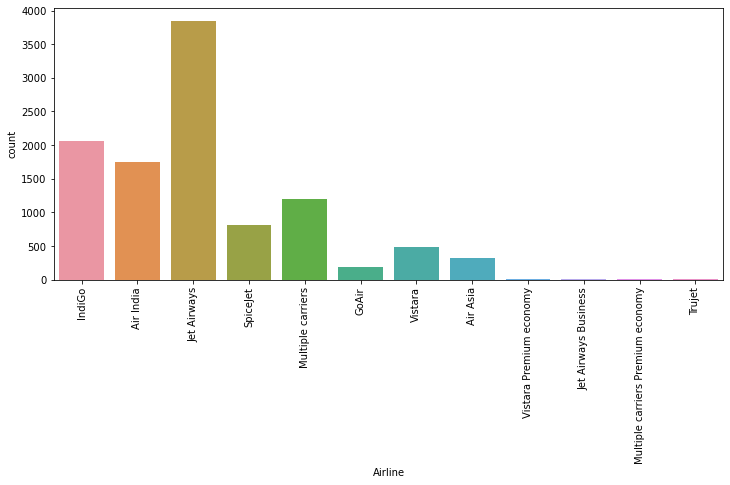

In [18]:
plt.figure(figsize=(12,5))
count15=sns.countplot(df['Airline'])
count15.set_xticklabels(count15.get_xticklabels(),rotation=90)
plt.show()

Observations:
    
    1.Most of the observations are from Jet Airways,Indigo,Air India

In [28]:
#lets create a temporary dataframe
df1=df

In [21]:
import time
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df1['Airline'])
label_Airline=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Airline']=le.fit_transform(df1['Airline'])

**Column 2: Date_of_Journey**

In [29]:
df1['Date_of_Journey'].head()

0   2019-03-24
1   2019-01-05
2   2019-09-06
3   2019-12-05
4   2019-01-03
Name: Date_of_Journey, dtype: datetime64[ns]

In [30]:
df1['year']=pd.DatetimeIndex(df1['Date_of_Journey']).year

In [31]:
df1['Month']=pd.DatetimeIndex(df1['Date_of_Journey']).month

In [33]:
df1.drop('Date_of_Journey',axis=1,inplace=True)

**Column 3:Source**

In [35]:
df1['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

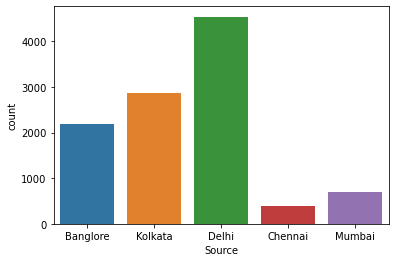

In [36]:
sns.countplot(df1['Source'])

Observations:
    
    1.Most of the observations are made from Delhi,Kolkata,and Bangalore.

In [37]:
le.fit(df1['Source'])
label_Source=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Source']=le.fit_transform(df1['Source'])

**Column 4:Destination**

In [39]:
df1['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

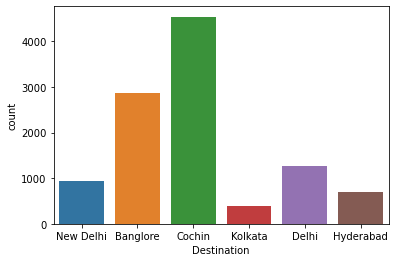

In [40]:
sns.countplot(df1['Destination'])

Observations:
    
    1.Cochin,Bangalore and Delhi are the major destined places.

In [41]:
le.fit(df1['Destination'])
label_Destination=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Destination']=le.fit_transform(df1['Destination'])

**Column 5:Route**

In [43]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [57]:
df1['Route'].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
CCU ? DEL ? BLR                       565
BLR ? BOM ? DEL                       402
MAA ? CCU                             381
DEL ? HYD ? COK                       326
DEL ? JAI ? BOM ? COK                 240
DEL ? BLR ? COK                       232
DEL ? COK                             213
DEL ? AMD ? BOM ? COK                 205
DEL ? MAA ? COK                       146
DEL ? IDR ? BOM ? COK                  99
DEL ? HYD ? MAA ? COK                  83
DEL ? NAG ? BOM ? COK                  71
CCU ? MAA ? BLR                        65
DEL ? GOI ? BOM ? COK                  58
DEL ? HYD ? BOM ? COK                  56
CCU ? HYD ? BLR                        53
CCU ? BBI ? BLR                        50
DEL ? BHO ? BOM ? COK                  50
CCU ? IXR ? DEL ? BLR             

In [100]:
list1=df1['Route'].unique()
for i in range(0,129):
    df1['Route'].replace(list1[i],i,inplace=True)

<AxesSubplot:xlabel='Route', ylabel='Density'>

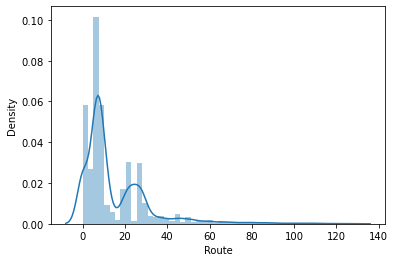

In [101]:
sns.distplot(df1['Route'])

**Column 6:Dep_Time**

In [60]:
le.fit(df1['Dep_Time'])
label_Dep_Time=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Dep_Time']=le.fit_transform(df1['Dep_Time'])

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

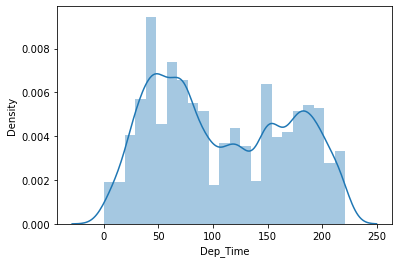

In [61]:
sns.distplot(df1['Dep_Time'])

In [66]:
label_Dep_Time[0]

'00:20'

In [64]:
label_Dep_Time[75]

'09:50'

Observations:
    
    1.Majority of the flights starts from night 12 to morining 10.

**Column 7: Arrival_Time**

In [67]:
le.fit(df1['Arrival_Time'])
label_Arrival_Time=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Arrival_Time']=le.fit_transform(df1['Arrival_Time'])

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

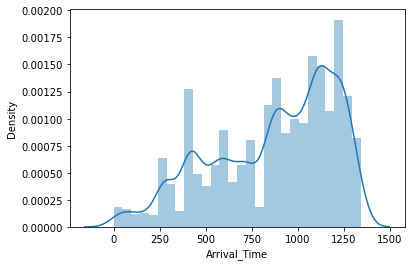

In [68]:
sns.distplot(df1['Arrival_Time'])

**Column 8:Duration**

In [71]:
le.fit(df1['Duration'])
label_Duration=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Duration']=le.fit_transform(df1['Duration'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

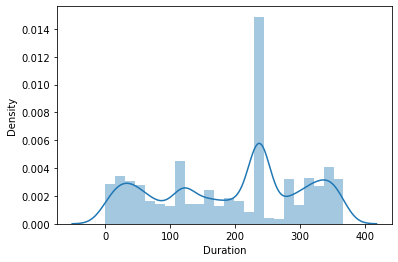

In [72]:
sns.distplot(df1['Duration'])

Observations:
    
    1.Almost all the duration has got equal weightage.

**Column 9:Total_Stops**

In [74]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

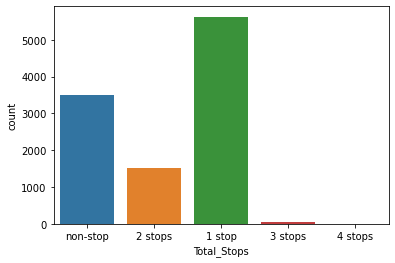

In [75]:
sns.countplot(df1['Total_Stops'])

Observations:
    
    1.In this case 1 stop tops the chart followed by non stop and 2 stop.

In [92]:
df1['Total_Stops'].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

In [78]:
df1['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops ','4 stops'],[1,0,2,3,4],inplace=True)

In [90]:
df1['Total_Stops'].unique()

array([0, 2, 1, '3 stops', nan, 4], dtype=object)

In [91]:
df1['Total_Stops'].replace('3 stops',3,inplace=True)

**Column 10:Additional_Info**

In [102]:
df1['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

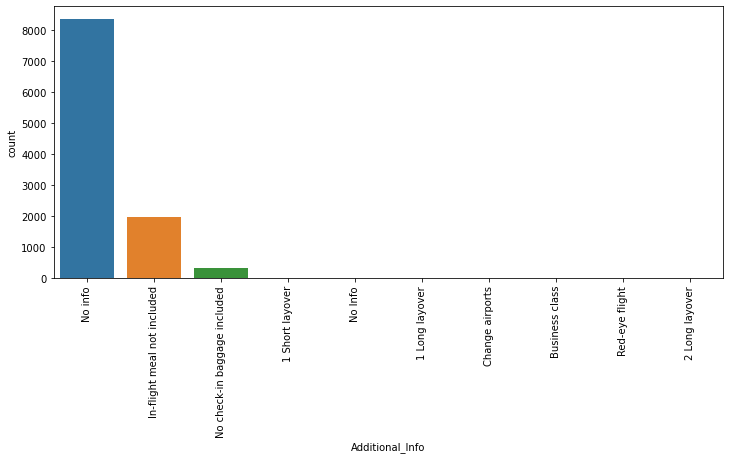

In [103]:
plt.figure(figsize=(12,5))
count115=sns.countplot(df1['Additional_Info'])
count115.set_xticklabels(count115.get_xticklabels(),rotation=90)
plt.show()

Observations:
    
    1.Most of the data contains no info.

In [104]:
le.fit(df1['Additional_Info'])
label_Additional_Info=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Additional_Info']=le.fit_transform(df1['Additional_Info'])

**Column 11: Price**

<AxesSubplot:xlabel='Price', ylabel='Density'>

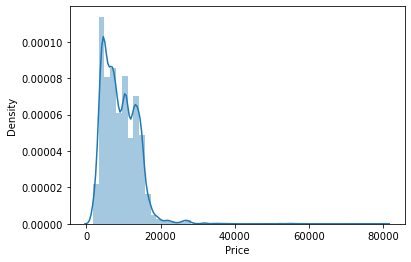

In [105]:
sns.distplot(df1['Price'])

Observations:
    
    1.The price ranges from 0 to 20000.

In [106]:
le.fit(df1['year'])
label_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['year']=le.fit_transform(df1['year'])

In [107]:
le.fit(df1['Month'])
label_Month=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Month']=le.fit_transform(df1['Month'])

In [109]:
le.fit(df1['Airline'])
label_Airline=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Airline']=le.fit_transform(df1['Airline'])

In [110]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,Month
0,3,0,5,0,211,233,240,0.0,8,3897,0,1
1,1,3,0,1,31,906,336,2.0,8,7662,0,0
2,4,2,1,2,70,413,106,2.0,8,13882,0,5
3,3,3,0,3,164,1324,311,1.0,8,6218,0,6
4,3,0,5,4,149,1237,303,1.0,8,13302,0,0


# Multivariate analysis

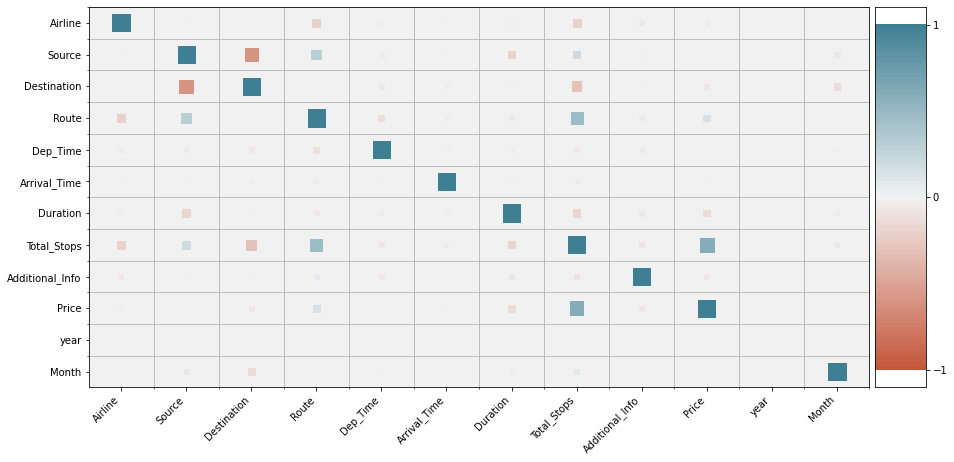

In [112]:
plt.figure(figsize=(15,7))
corrplot(df1.corr(),size_scale=300)
plt.show()

Observations:
    
    There are some independent variable which are significantly correlated with response variable
        1.Route
        2.Duration
        3.Total_Stops

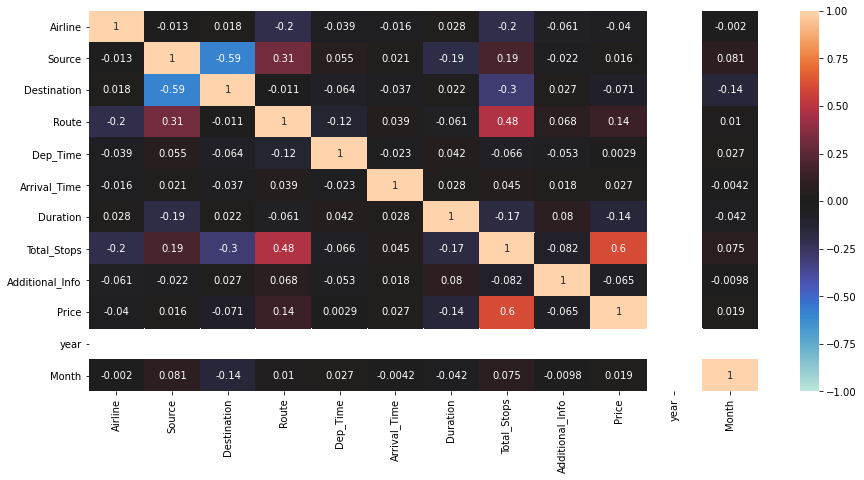

In [113]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    There are some independent variables which are significantly correlated with each other.
        1.Destination vs source
        2.Route vs Airline
        3.Route vs source
        4.Total stops vs airline
        5.duration vs source
        6.Total stops vs source
        7.Total stops vs destination
        8.Route vs total stops

# Bi variate analysis

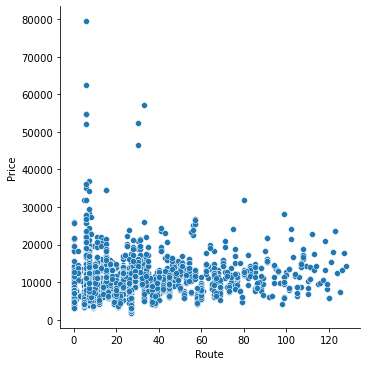

In [116]:
sns.relplot(x='Route',y='Price',data=df1)

Observations:
    
    1.We can see that almost every route has same ranges of price.

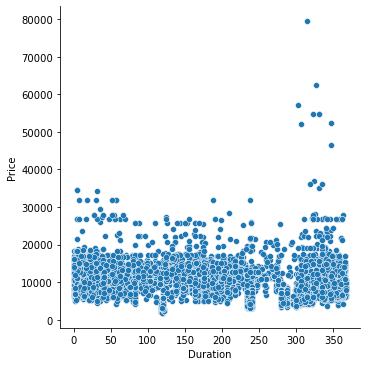

In [118]:
sns.relplot(x='Duration',y='Price',data=df1)

Observations:
    
    1.We can see that as duration increases the flight price is also gonna increase.

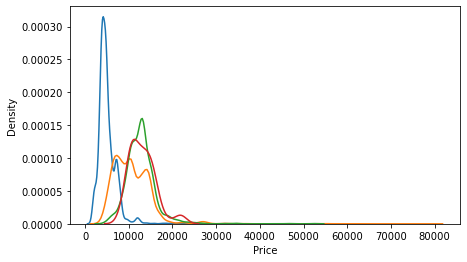

In [120]:
Total_Stops=df1.groupby('Total_Stops')
Total_Stops_0=Total_Stops.get_group(0)
Total_Stops_1=Total_Stops.get_group(1)
Total_Stops_2=Total_Stops.get_group(2)
Total_Stops_3=Total_Stops.get_group(3)
Total_Stops_4=Total_Stops.get_group(4)
plt.figure(figsize=(7,4))
sns.distplot(Total_Stops_0['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_1['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_2['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_3['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_4['Price'],hist=False,rug=False)
plt.show()

Observations:
    
    1.We can see that in most of the cases for an non stop flight the price will be less .

In [122]:
df1['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

In [123]:
df1['Source'].value_counts()

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

In [125]:
df1[(df1.Source==0)&(df1.Destination==0)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [126]:
df1[(df1.Source==0)&(df1.Destination==1)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [127]:
df1[(df1.Source==0)&(df1.Destination==2)].count()

Airline            1265
Source             1265
Destination        1265
Route              1265
Dep_Time           1265
Arrival_Time       1265
Duration           1265
Total_Stops        1265
Additional_Info    1265
Price              1265
year               1265
Month              1265
dtype: int64

In [128]:
df1[(df1.Source==0)&(df1.Destination==3)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [129]:
df1[(df1.Source==0)&(df1.Destination==4)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [130]:
df1[(df1.Source==0)&(df1.Destination==5)].count()

Airline            932
Source             932
Destination        932
Route              932
Dep_Time           932
Arrival_Time       932
Duration           932
Total_Stops        932
Additional_Info    932
Price              932
year               932
Month              932
dtype: int64

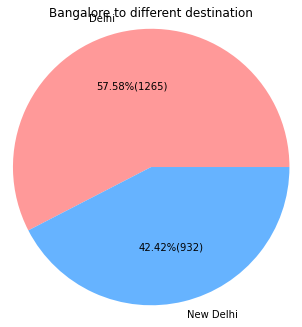

In [134]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Delhi','New Delhi']
value=[1265,932]
colors = ['#ff9999','#66b3ff']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Bangalore to different destination')
plt.show()

Observations:
    
    1.48% of the flights from source bangalore is to Delhi

In [135]:
df1[(df1.Source==1)&(df1.Destination==0)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [136]:
df1[(df1.Source==1)&(df1.Destination==1)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [137]:
df1[(df1.Source==1)&(df1.Destination==2)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [138]:
df1[(df1.Source==1)&(df1.Destination==3)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [139]:
df1[(df1.Source==1)&(df1.Destination==4)].count()

Airline            381
Source             381
Destination        381
Route              381
Dep_Time           381
Arrival_Time       381
Duration           381
Total_Stops        381
Additional_Info    381
Price              381
year               381
Month              381
dtype: int64

In [140]:
df1[(df1.Source==1)&(df1.Destination==5)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

Observations:
    
    1.Chennai to New delhi there are 381 observations.

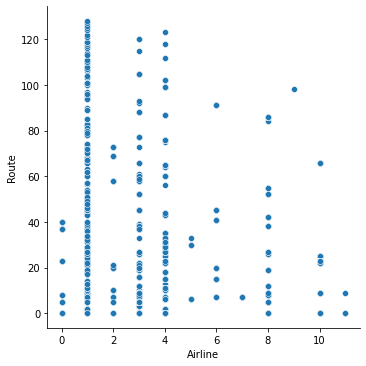

In [142]:
sns.relplot(y='Route',x='Airline',data=df1)

In [143]:
label_Airline[1]

'Air India'

Observations:
    
    1.Air India takes almost all the different routes available to reach the destination.

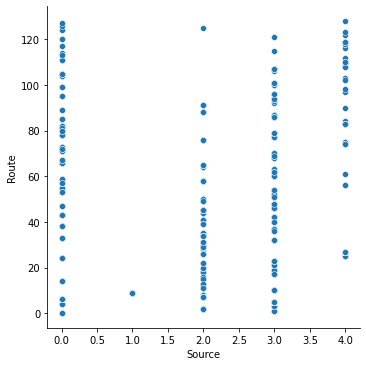

In [144]:
sns.relplot(y='Route',x='Source',data=df1)

Observations:
    
    1.Chennai source takes very less routes.

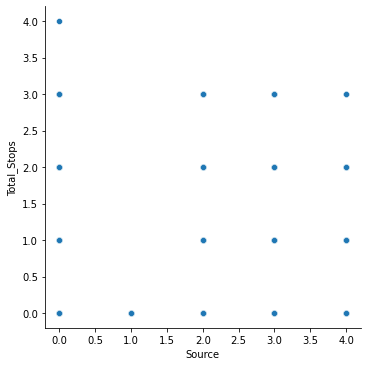

In [145]:
sns.relplot(y='Total_Stops',x='Source',data=df1)

Observations:
    
    1.All flights from the chennai has 0 stops.

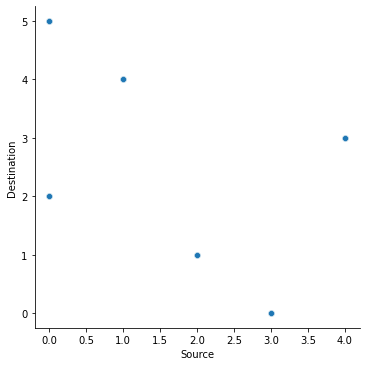

In [146]:
sns.relplot(y='Destination',x='Source',data=df1)

Observations:
    
    1.From source Bangalore destination is held from Delhi and New Delhi.
    2.From source chennai destination i sheld for only Kolkata

# Cleaning the data

In [150]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [155]:
df1['Total_Stops'].fillna(1,inplace=True)

In [156]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [157]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,Month
0,3,0,5,0,211,233,240,0.0,8,3897,0,1
1,1,3,0,1,31,906,336,2.0,8,7662,0,0
2,4,2,1,2,70,413,106,2.0,8,13882,0,5
3,3,3,0,3,164,1324,311,1.0,8,6218,0,6
4,3,0,5,4,149,1237,303,1.0,8,13302,0,0


# Processing the test data

In [158]:
df_test=pd.read_csv('Flight Price Prediction Test.csv',parse_dates=['Date_of_Journey'])

In [176]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_new,year,Month
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,76,2019,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,65,2019,12
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,76,2019,5
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,76,2019,5
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16,2019,6


In [166]:
df_test['Route_new']=le.fit_transform(df_test['Route'])

In [169]:
df_test['year']=pd.DatetimeIndex(df_test['Date_of_Journey']).year

In [170]:
df_test['Month']=pd.DatetimeIndex(df_test['Date_of_Journey']).month

In [171]:
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [174]:
df_test.drop('Route',axis=1,inplace=True)

In [178]:
categorical=['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info','year',
       'Month']
for i in categorical:
    df_test[i]=le.fit_transform(df_test[i])

In [179]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_new,year,Month
0,4,2,1,138,150,10,0,5,76,0,4
1,3,3,0,31,353,248,0,5,65,0,6
2,4,2,1,156,566,148,0,3,76,0,3
3,6,2,1,48,633,36,0,5,76,0,3
4,0,0,2,198,135,216,4,5,16,0,4


In [181]:
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Route_new          0
year               0
Month              0
dtype: int64

In [183]:
df1.drop('Route',axis=1,inplace=True)

In [188]:
df1['Route']=df['Route']

In [192]:
list1=df1['Route'].unique()
for i in range(0,129):
    df1['Route'].replace(list1[i],i,inplace=True)

In [199]:
df_test.rename(columns = {'Route_new':'Route'}, inplace = True)

# Removing the outliers

In [203]:
from scipy.stats import zscore

# zscore method

In [204]:
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 1.0


Observations:
    
    1.No need to remove the outliers.

# Splitting the target variables

In [205]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [207]:
x.shape

(10683, 11)

In [208]:
y.shape

(10683,)

# Removal of skewness

In [210]:
x.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.317049
Additional_Info   -1.779838
year               0.000000
Month             -0.137820
Route              2.494584
dtype: float64

Observations:
    
    1.No need to remove the skewness for categorical column.

# Building the models

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [212]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.46334360913211503 on random state 192


In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=192)

In [214]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (7478, 11)
x test shape (3205, 11)


y train shape: (7478,)
y test shape (3205,)


In [215]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.463
RMSE: 3212.581
mean absolute error: 2440.505


In [219]:
#lasso model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.463
RMSE: 3212.581
mean absolute error: 2440.505


In [220]:
#Ridge model
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.463
RMSE: 3212.581
mean absolute error: 2440.505


In [224]:
#ElasticNet model
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.463
RMSE: 3212.578
mean absolute error: 2440.49


In [225]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.296
RMSE: 3678.41
mean absolute error: 2648.213


In [227]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.841
RMSE: 1749.737
mean absolute error: 961.534


# Cross validation scores

In [228]:
models=[ln,ls,rd,enr,ran,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.418


Lasso(alpha=0.001) score is:
0.418


Ridge(alpha=0.001) score is:
0.418


ElasticNet(alpha=0.0001) score is:
0.418


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.251


RandomForestRegressor() score is:
0.82




Observations:
    
    The difference between r2 score and cross val value of models are as below:
    1.LinearRegression:0.045
    2.Lasso           :0.045
    3.Ridge           :0.045
    4.ElasticNet      :0.045
    5.RANSACRegressor :0.045
    6.RF              :0.021

        So the best model is Random Forest Regressor.

# Hyper parameter tuning

In [ ]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

Observations:
    
    1.The resulted values been inputed, since I refreshed it its still runnin

In [230]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2,bootstrap=True)

In [231]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.824
RMSE: 1838.861
mean absolute error: 1167.222


In [232]:
Flight_pred=rf1.predict(df_test)

In [234]:
df_pr=pd.DataFrame()
df_pr['predicted']=Flight_pred
df_pr.to_csv("predictedprice.csv")

# Saving the model

In [235]:
import joblib
joblib.dump(rf1,'rf1flight.obj')

['rf1flight.obj']